# Compression Data via Dimensionality Reduction

- An alternative to **Feature selection** is **Feature extraction**
- Here we learn how to summarize content of a dataset by transforming into new feature subspace of lower dimensionality 


## Unsupervised dimensionality reduction via principal component analysis

- feature extraction transforms or projects the data into a new feature subspace
- feature extraction = data compression (in dimensionality reduction context) which
  - improves storage space
  - computational efficiency
  - predictive performance (by reducing the curse of dimensionality) especially for non-regularized models

### The main steps in pricipal component analysis

- principal component analysis (PCA) - unsupervised linear transformation technique used as
  - feature extraction
  - exploratory data analysis
  - denoising of signals in stock market trading
  - analysis of genome data 
- PCA helps identify patterns based on correlation between features
- PCA aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal of fewer dimensions than the original one. 
- The orthogonal axes (pricipal component)
  - directions of maximum variance
  - given the constraint that the new feature axes are orthogonal to each other
- PC1 and PC2 are the principal components
- Using PCA for dimensionality reduction, 
  - construct a $ d \times k$-dimensional transformation matrix $\mathbf{W}$ 
  - maps the features of a training example $x$ onto a new $k$-dimensional feature subspace that is lesser than $d$

$$
\textbf{x} = [x_1, x_2, \dots x_d], \mathbf{x} \in \Reals^d \\
\mathbf{W}  \in \Reals^{d \times k} \\
\textbf{x}\mathbf{W} = \mathbf{z} \\
\mathbf{z} = [z_1, z_2, \dots z_k], \mathbf{z} \in \Reals^k \\
$$

- $k << d$
- the first principal component will have the largest variance
- succeeding pricipal component will have the largest variance given that they are uncorrelated (orthogonal) to  other  pricipal components
- if PCA directions are  highly sensitive to data scaling, we need to standardize the features prior to PCA. We want to assign equal importance

**PCA algorithm**

1. standardize the $d$-dimensional dataset
2. Contruct a covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors
5. select $k$ eigenvectors corresponding to the $k$ largest eigenvalues ($k$ is the dimensionality of the new feature subspace)
6. Construct a projection matrix $\mathbf{W}$ from the "top" $k$ eigenvectors
7. Transform the $d$-dimensional input dataset $\mathbf{X}$ using the projection matrix  $\mathbf{W}$ to obtain the new $k$-dimensional feature subspace

### Extracting the principal component step by step

1. Standardizing the data
2. Constructing the covariance matrix
3. Obtaining the eigenvalues and eigenvectors of the covariance matrix
4. Sorting the eigenvalues by decreasing order to rank the eigenvectors

#### Load the dataset

In [1]:
import pandas as pd

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

#### Standardizing the data

- split for data is 70/30

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

- Standardize the data


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### Constructing the covariance matrix

The covariance matrix is a pairwise matrix. 

For example, the following is the covariance between features $x_j$ and $x_k$

$$
\sigma_{jk} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)
$$

- The $\mu$ stands for the sample mean. If the dataset is standardized, then the sample mean is zero
- A positive covariance means the features increase or decrease together
- A negative covariance features will vary in opposite directions

**Example covariance matrix of three features**

$$
\Sigma = 
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_3^2
\end{bmatrix}
$$


In [4]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
cov_mat.shape

(13, 13)

#### Obtaining the eigenvalues and eigenvectors of the covariance matrix

- Eigenvectors of the covariance matrix represent the principal components





In [5]:
from pprint import pprint

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("Eigenvalues")
pprint(eigen_vals)

Eigenvalues
array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])


### Total and explained variance

- To reduce the dimensionality, select a subset of the eigenvectors (PC) that contains most of the information (variance)
- sort the eigenvectors based on eigenvalues
- we are interested on the top $k$ eigenvectors

Before proceeding, lets visualize and plot the **variance explained ratios** of the eigenvalues

**Variance explained ratio**

$$
\text{Explained variance ratio} = \frac{\lambda_j}{\sum_{j=1}^{d} \lambda_j}
$$


In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

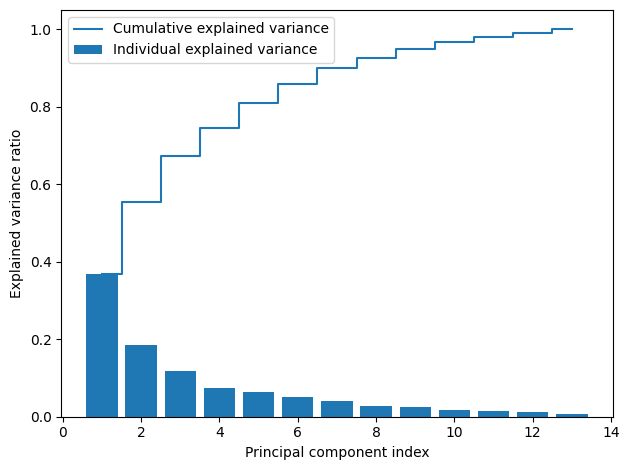

In [7]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, align="center", label="Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where="mid", label="Cumulative explained variance")

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

- The first PC alone acounts for 40% percent of the variance
- the first two PC accounts for 60%

### Feature transformation

1. Select $k$ eigenvectors corresponding to the $k$ largest eigenvalues ($k$ is the new dimensionality)
2. Construct the projection matrix $W$ from the "top" $k$ eigenvectors
3. transform $d$ dimensional input dataset $X$ using projection matrix $W$ to obtain the new $k$-dimensional feature subspace

**Sort**

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

**Construct projection matrix $\mathbf{W}$**

We collect two eigenvectors that accounts for 60% of the variance of the dataset

- reason for choosing $k=2$ is for illustration
- $k$ has to be determined using efficiency v. performance tradeoff

In [9]:
k = 2
col_stack = [eigen_pairs[i][1][:, np.newaxis] for i in range(k)]
w = np.hstack(col_stack)

# w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print("Matrix W:")
pprint(w)
print(w.shape)

Matrix W:
array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])
(13, 2)


**Transform feature space**

$$
\mathbf{X}' = \mathbf{X} \mathbf{W}
$$

In [10]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [11]:
np.dot(X_train_std[0], w)

array([2.38299011, 0.45458499])

In [12]:
X_train_pca = X_train_std.dot(w)
X_train_pca.shape

(124, 2)

**Visualize**

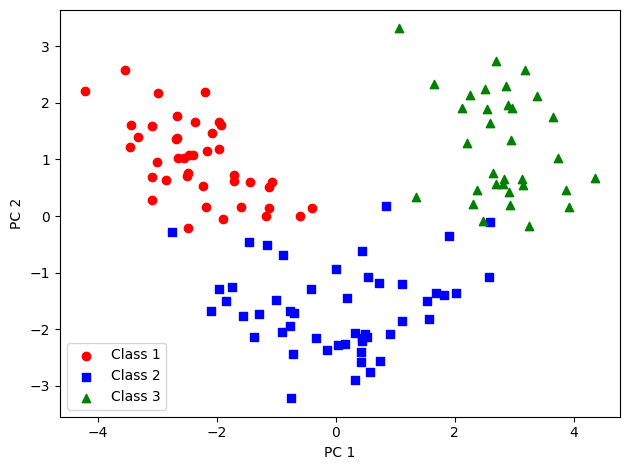

In [13]:
colors = ["r", "b", "g"]
markers = ["o", "s", "^"]
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(
        X_train_pca[y_train == l, 0],
        X_train_pca[y_train == l, 1],
        c=c,
        label=f"Class {l}",
        marker=m,
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

### Principal component analysis in scikit-learn

- PCA class in scikit-learn 
- apply this PCA class to wine dataset
  

/home/krojas/apps/mambaforge/envs/dsp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


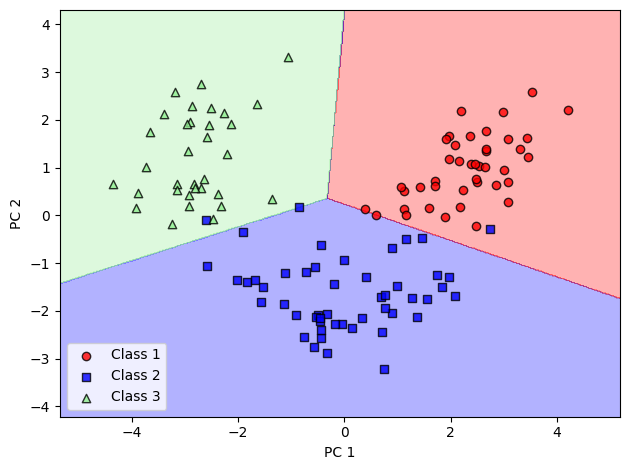

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from convenience_function import plot_decision_regions

# Initialize the PCA transformer and logistic regression estimator
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class="ovr", random_state=1, solver="lbfgs")

# Dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()